In [32]:
# Libraries to be imported
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [8]:
# Create the DataFrame
df = pd.DataFrame({
    'Item_Identifier': ['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19'],
    'Item_Weight': [9.3, 5.92, 17.5, 19.2, 8.93],
    'Item_Fat_Content': ['Low Fat', 'Regular', 'Low Fat', 'Regular', 'Low Fat'],
    'Item_Visibility': [0.016, 0.019, 0.016, 0.0, 0.0],
    'Item_Type': ['Fruit and Vegetables', 'Soft Drinks', 'Snack Foods', 'Frozen Foods', 'Household'],
    'Item_MRP': [249.8092, 48.2692, 141.618, 182.095, 53.8614],
    'Outlet_Identifier': ['OUT049', 'OUT018', 'OUT049', 'OUT010', 'OUT013'],
    'Outlet_Establishment_Year': [1999, 2009, 1999, 1998, 1987],
    'Outlet_Size': ['Medium', 'Medium', 'Medium', 'Small', 'High'],
    'Outlet_Location_Type': ['Tier 1', 'Tier 3', 'Tier 1', 'Tier 3', 'Tier 3'],
    'Outlet_Type': ['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1', 'Grocery Store', 'Supermarket Type1'],
    'Item_Outlet_Sales': [3735.138, 443.4228, 2097.27, 732.38, 994.7052]
})


In [9]:
# Save the DataFrame as a CSV file
df.to_csv('bigmart_sales.csv', index=False)

In [10]:
#import pandas as pd
data = pd.read_csv('bigmart_sales.csv')
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016,Fruit and Vegetables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016,Snack Foods,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000,Frozen Foods,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
# Preprocessing
df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True) #fillna is used to fill the empty spaces of column or row
df['Outlet_Size'].fillna(('Medium'), inplace=True)

In [20]:
le = LabelEncoder() #to convert categorical variables to numeric data
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

In [21]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']) #to set text data as dummy (binary) variables

In [22]:
scaler = MinMaxScaler() #transform features by scaling each feature to a given range
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = scaler.fit_transform(df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])
                                                                                  #it is used on the training data so that we can scale the training data and also learn the scaling parameters of the data

In [11]:
# Convert categorical variables to numerical values using one-hot encoding
import pandas as pd
data = pd.get_dummies(data, columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [15]:
# Split the data into input and output variables
X = data.drop(['Item_Outlet_Sales'], axis=1).values.astype('float32')
y = data['Item_Outlet_Sales'].values.astype('float32')

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#training sets are commonly used to estimate different parameters or to compare different model performance
#the testing data set is used after the training is done

In [19]:
# Define the model architecture
#the core idea of sequential API is simply arranging the keras layers in a sequential order and 
#so is called sequential API
#keras is a open source software library 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [31]:
# Compile the model with an appropriate loss function and optimizer
model.compile(loss='mse', optimizer='adam') #metrics=['mae'])
#mse(mean squared error) = cost function
#adam = it is a replacement optimization algo for stochastic gradient descent 

In [25]:
# Train the model on the training data and evaluate it on the validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
#model.fit function provides fit stats calculated across all of the models 
#epoch refers to the one entire passing of training data through the algo

Epoch 1/50
1/1 [==============================] - 0s 479ms/step - loss: 6111978.0000 - mae: 2172.5493 - val_loss: 490907.2812 - val_mae: 700.6478
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 5966677.0000 - mae: 2138.8896 - val_loss: 445014.0625 - val_mae: 667.0938
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 5824825.0000 - mae: 2105.5093 - val_loss: 401731.4375 - val_mae: 633.8229
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 5689211.0000 - mae: 2072.8379 - val_loss: 361252.2188 - val_mae: 601.0426
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 5563561.0000 - mae: 2042.0179 - val_loss: 326044.0625 - val_mae: 571.0027
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 5443445.5000 - mae: 2012.3743 - val_loss: 293058.3438 - val_mae: 541.3486
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 5326551.0000 - mae: 1983.1221 - val_loss: 262208.8125 - va

In [21]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 188ms/step - loss: 539451.0000 - mae: 734.4733
Test loss: [539451.0, 734.4732666015625]


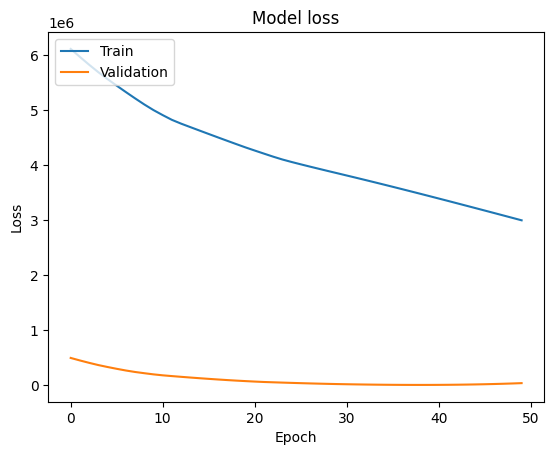

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 44ms/step


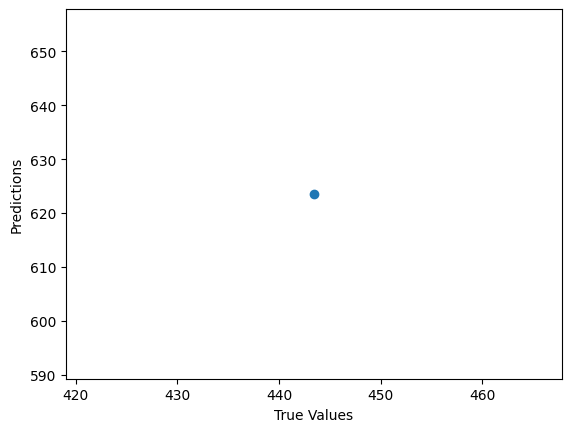

In [27]:
# Plot predicted vs true sales values
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
#This will create a scatter plot showing the predicted sales values on the y-axis and the true sales values on the x-axis. The y_test array contains the true sales values for the test set, while model.predict(X_test) contains the predicted sales values for the test set.

In [30]:
# Convert categorical variables to numerical values using one-hot encoding
#data = pd.get_dummies(data, columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [28]:
model.predict(data.drop(['Item_Outlet_Sales'], axis=1).values.astype('float32'))
#to predict the sales of the items

1/1 [==============================] - 0s 995us/step


array([[651.36926],
       [623.5556 ],
       [634.64856],
       [639.61304],
       [618.2874 ]], dtype=float32)